In [3]:
%matplotlib inline
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from root_numpy import root2array

In [1]:
filedir = '/Users/davidkaleko/Data/larlite/082416_selection_output/'
filedir_sc = '/Users/davidkaleko/Data/larlite/090616_selection_output/'
#!ls -ltra $filedir

track_producer = 'pandoraNuPMA'
vtx_producer = 'pmtrack'

mcnu = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_1.root'%(track_producer,vtx_producer)
mcnu_sc = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_1_SPACECHARGE.root'%(track_producer,vtx_producer)
datanu = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_3.root'%(track_producer,vtx_producer)
databkg = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_2.root'%(track_producer,vtx_producer)

files = { 'mcnu' : filedir + mcnu,
          'mcnu_SC' : filedir_sc + mcnu_sc,
         'datanu' : filedir + datanu, 
         'databkg' : filedir + databkg }

In [4]:
df_dict = {}

for sample, filepath in files.iteritems():
    df_dict[sample] = pd.DataFrame( root2array ( filepath, 'MCS_bias_tree' ) )
    
    #temp adding column
    df_dict[sample]['MCS_linecut'] = df_dict[sample]['full_MCS_energy'] > \
        (0.15 + 1.25*df_dict[sample]['full_range_energy'])

In [5]:
print df_dict['mcnu'].columns.values

['length_analyzed' 'full_length' 'full_range_energy' 'MCS_energy'
 'full_MCS_energy' 'MCS_linecut']


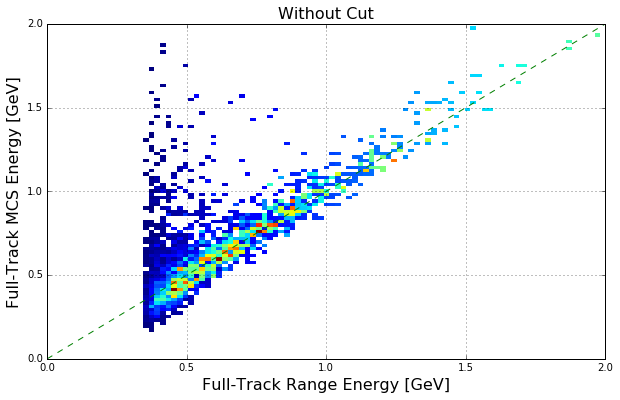

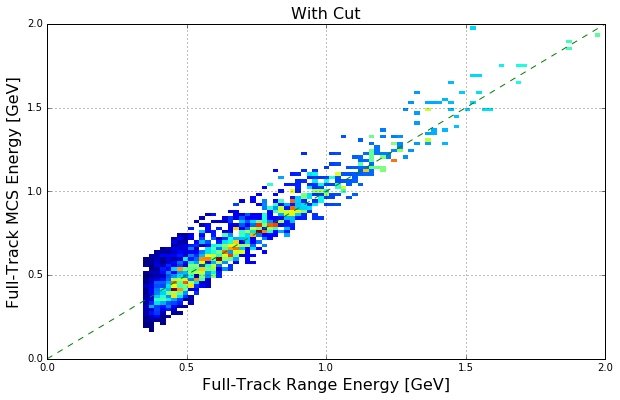

In [6]:

plt.figure(figsize=(10,6))

myy = df_dict['mcnu']['full_MCS_energy']
myx = df_dict['mcnu']['full_range_energy']

fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
plt.grid(True)
fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)

plt.plot([0,8],[0,8],'g--')
plt.plot([0,8],[2.5,2.5],'r--')
plt.plot([2.5,2.5],[0,8],'r--')
plt.title("Without Cut",fontsize=16)

plt.figure(figsize=(10,6))

myy = df_dict['mcnu'].query('not MCS_linecut')['full_MCS_energy']
myx = df_dict['mcnu'].query('not MCS_linecut')['full_range_energy']

fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
plt.grid(True)
fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)

plt.plot([0,8],[0,8],'g--')
blah = plt.title("With Cut",fontsize=16)

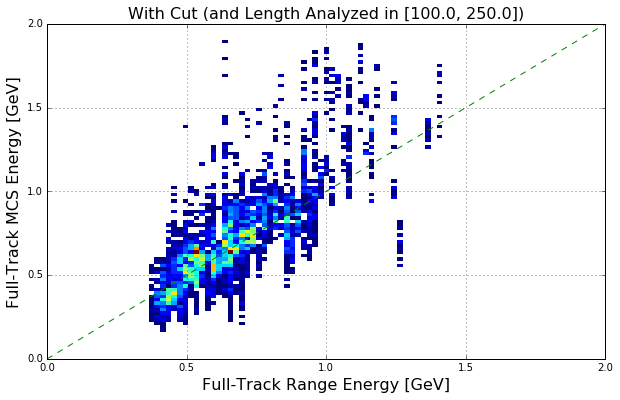

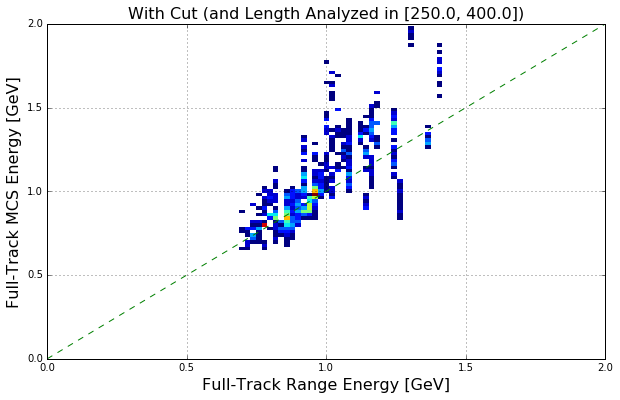

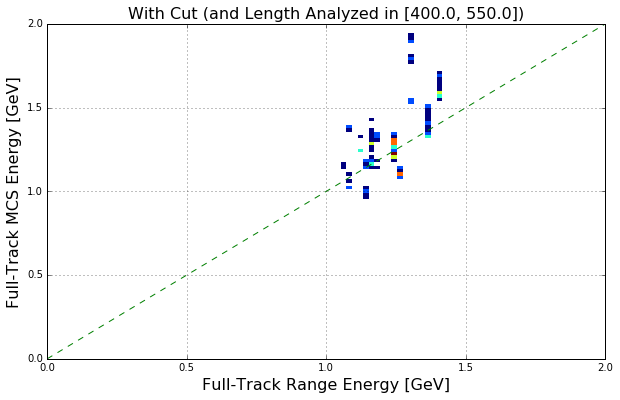

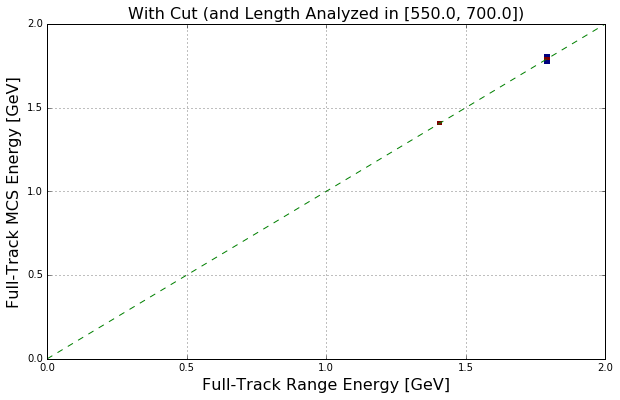

In [7]:
mylen_mins = np.linspace(100,700,5)
for x in xrange(len(mylen_mins)-1):
    mylen_min = mylen_mins[x]
    mylen_max = mylen_mins[x+1]
    plt.figure(figsize=(10,6))

    myquery = 'not MCS_linecut and length_analyzed > %f and length_analyzed < %f'%(mylen_min,mylen_max)
    myquery += ' and (full_length - length_analyzed > 10)'

    myy = df_dict['datanu'].query(myquery)['MCS_energy']
    myx = df_dict['datanu'].query(myquery)['full_range_energy']
    
    fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
    plt.grid(True)
    fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
    fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)
    
    plt.plot([0,8],[0,8],'g--')
    plt.title("With Cut (and Length Analyzed in [%0.1f, %0.1f])" % (mylen_min,mylen_max),fontsize=16)

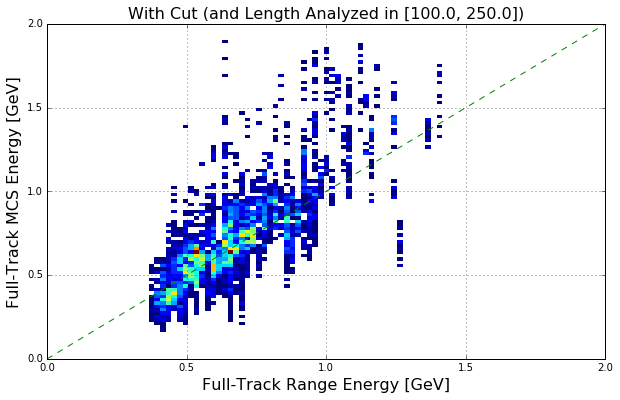

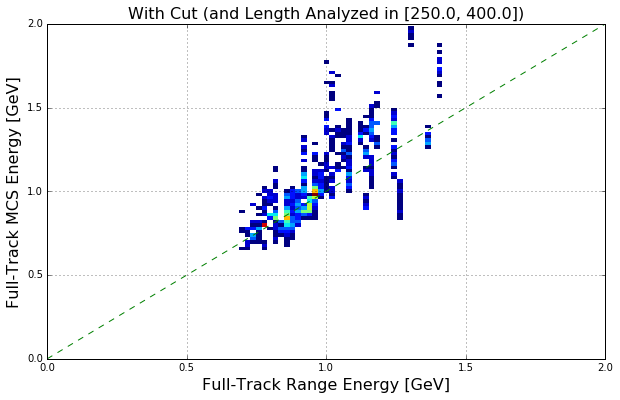

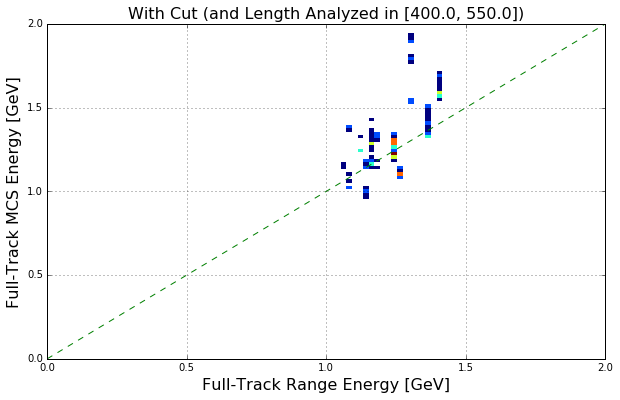

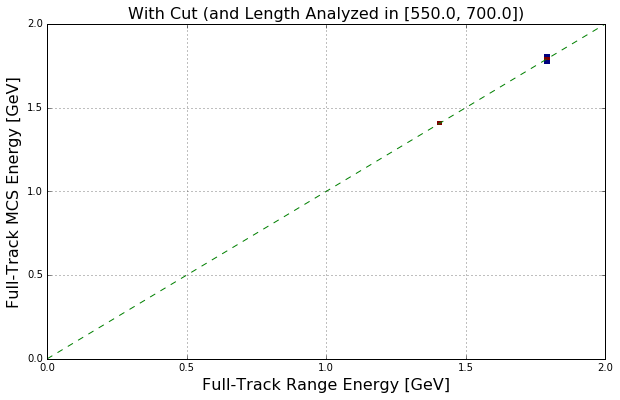

In [8]:
mylen_mins = np.linspace(100,700,5)
for x in xrange(len(mylen_mins)-1):
    mylen_min = mylen_mins[x]
    mylen_max = mylen_mins[x+1]
    plt.figure(figsize=(10,6))

    myquery = 'not MCS_linecut and length_analyzed > %f and length_analyzed < %f'%(mylen_min,mylen_max)
    myquery += ' and (full_length - length_analyzed > 10)'
    
    myy = df_dict['datanu'].query(myquery)['MCS_energy']
    myx = df_dict['datanu'].query(myquery)['full_range_energy']
    
    fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
    plt.grid(True)
    fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
    fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)
    
    plt.plot([0,8],[0,8],'g--')
    plt.title("With Cut (and Length Analyzed in [%0.1f, %0.1f])" % (mylen_min,mylen_max),fontsize=16)

In [8]:
print df_dict['datanu'].columns.values

['length_analyzed' 'full_length' 'full_range_energy' 'MCS_energy'
 'full_MCS_energy' 'MCS_linecut']


In [68]:
#reco-true/true
def money_plot():
    mytypes = ['mcnu','mcnu_SC']
    binning = np.linspace(120,450,25)
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds, myerrs = {}, {}, {}
    for mytype in mytypes:
        myreses[mytype], mystds[mytype], myerrs[mytype] = [], [], []
        
    for x in xrange(len(binning)-1):
        binmin = binning[x]
        binmax = binning[x+1]
        myquery = 'not MCS_linecut and length_analyzed > %f and length_analyzed < %f'%(binmin,binmax)
        myquery += ' and ( (full_length - length_analyzed) < 20)'
        #print myquery
        for sample in mytypes:
            mydf = df_dict[sample].query(myquery)
            true = mydf['full_range_energy'].values
            reco = mydf['MCS_energy'].values
            mymean = ((reco-true)/true).mean()
            mystd = ((reco-true)/true).std()
            myerr = mystd / np.sqrt( float(len(true)) )
            myreses[sample].append( float('%0.2f' % mymean ) )
            mystds[sample].append( float('%0.2f' % mystd ) )
            myerrs[sample].append( float('%0.2f' % myerr ) )
            
    plt.figure(figsize=(10,6))
    for mytype in mytypes:
        #plt.plot(bincenters[:-1],myreses[mytype],'o--',label='Mean of Distribution (%s)'%mytype)
        #plt.plot(bincenters[:-1],mystds[mytype],'o--',label='Std of Distribution (%s)'%mytype)
        plt.errorbar(bincenters[:-1],myreses[mytype],yerr=myerrs[sample],fmt='o--',label='Mean of Distribution (%s)'%mytype)
    plt.ylabel('Mean($\\frac{MCS Energy - Range Energy}{Range Energy}$)',fontsize=15)
    plt.xlabel('Length of Track',fontsize=15)
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('MCS Bias (Up to 20cm from End)',fontsize=16)
    #plt.ylim((-0.05,0.2))
    #plt.ylim((-0.71,0.2))
    #print "Length vals:"
    print bincenters
    print "SC y-vals:"
    print myreses['mcnu_SC']
    print "MC y-vals:"
    print myreses['mcnu']


[ 126.875  140.625  154.375  168.125  181.875  195.625  209.375  223.125
  236.875  250.625  264.375  278.125  291.875  305.625  319.375  333.125
  346.875  360.625  374.375  388.125  401.875  415.625  429.375  443.125
  456.875]
SC y-vals:
[0.03, 0.02, 0.0, 0.03, 0.0, 0.02, 0.04, 0.04, 0.1, 0.04, 0.05, 0.03, 0.04, 0.03, 0.06, 0.04, 0.01, 0.06, 0.05, 0.06, 0.04, 0.06, 0.03, -0.01]
MC y-vals:
[0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.04, 0.04, 0.04, 0.05, 0.04, 0.03, 0.05, 0.06, 0.02, 0.03, 0.05, 0.07, 0.03, 0.03, 0.03, 0.01, 0.03, 0.03]


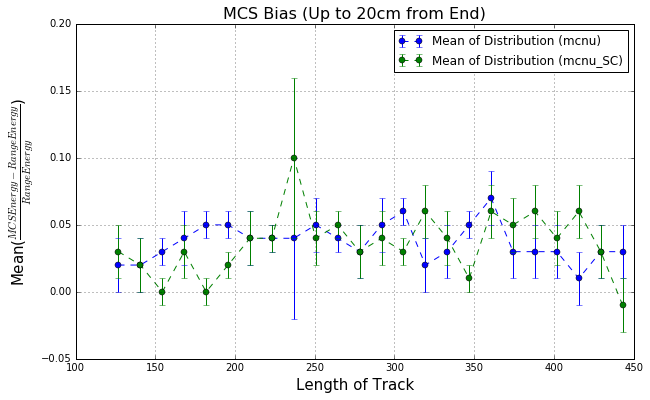

In [69]:
money_plot()

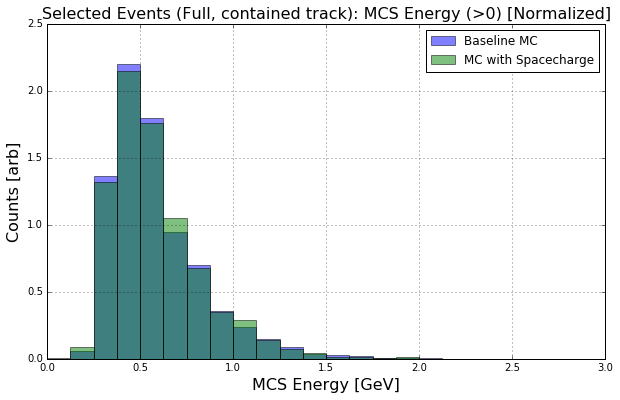

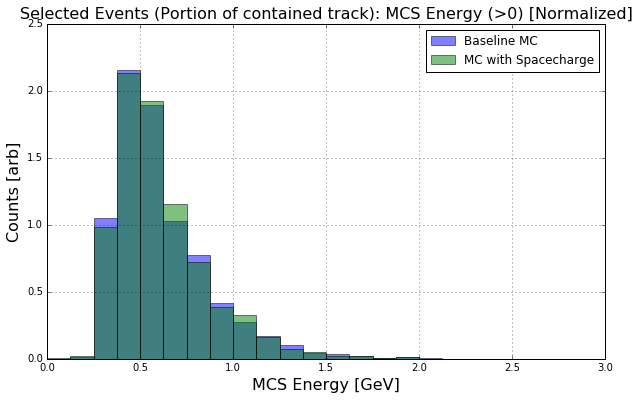

In [85]:
plt.figure(figsize=(10,6))
plt.grid(True)
myquery = 'not MCS_linecut and ( (full_length - length_analyzed) < 11)'
mybins = np.linspace(0,3,25)
mcnu_vals = df_dict['mcnu'].query(myquery)['full_MCS_energy'].values
mcnu_hist = np.histogram(mcnu_vals,bins=mybins,normed=True)
plt.hist(mcnu_vals,bins=mybins,normed=True,alpha=0.5,label='Baseline MC')
mcnu_sc_vals = df_dict['mcnu_SC'].query(myquery)['full_MCS_energy'].values # * 1.05
mcnu_sc_hist = np.histogram(mcnu_sc_vals,bins=mybins,normed=True)
plt.hist(mcnu_sc_vals,bins=mybins,normed=True,alpha=0.5,label='MC with Spacecharge')
plt.legend()
plt.title('Selected Events (Full, contained track): MCS Energy (>0) [Normalized]',fontsize=16)
plt.ylabel('Counts [arb]',fontsize=16)
plt.xlabel('MCS Energy [GeV]',fontsize=16)

plt.figure(figsize=(10,6))
plt.grid(True)
myquery = 'not MCS_linecut and ( (full_length - length_analyzed) > 11)'
myquery += ' and ( (full_length - length_analyzed) < 21)'
mcnu_vals = df_dict['mcnu'].query(myquery)['full_MCS_energy'].values * 1.00
mcnu_hist = np.histogram(mcnu_vals,bins=mybins,normed=True)
plt.hist(mcnu_vals,bins=mybins,normed=True,alpha=0.5,label='Baseline MC')
mcnu_sc_vals = df_dict['mcnu_SC'].query(myquery)['full_MCS_energy'].values
mcnu_sc_hist = np.histogram(mcnu_sc_vals,bins=mybins,normed=True)
plt.hist(mcnu_sc_vals,bins=mybins,normed=True,alpha=0.5,label='MC with Spacecharge')
plt.legend()
plt.title('Selected Events (Portion of contained track): MCS Energy (>0) [Normalized]',fontsize=16)
plt.ylabel('Counts [arb]',fontsize=16)
plt.xlabel('MCS Energy [GeV]',fontsize=16)

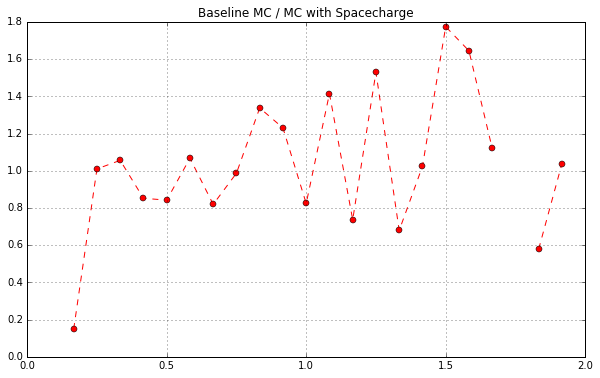

In [45]:
myy = mcnu_hist[0]/mcnu_sc_hist[0]
myx = mcnu_hist[1][:-1]
plt.figure(figsize=(10,6))
plt.plot(myx,myy,'ro--')
plt.grid(True)
plt.title("Baseline MC / MC with Spacecharge")
